In [15]:
import numpy

def f(x, y):
    return x - y - 1

numpy.random.seed()
N = 30
d = 2
X = numpy.random.randn(N, d)
T = numpy.array([1 if f(x, y) > 0 else -1 for x, y in X])
alpha = numpy.zeros(N)
beta = 1.0
gamma_alpha = 0.0001
gamma_beta = 0.1
itr = 1000

for _itr in range(itr):
    for i in range(N):
        delta = 1 - (T[i]*X[i]).dot(alpha*T*X.T).sum() - beta*T[i]*alpha.dot(T)
        alpha[i] += gamma_alpha*delta
    for i in range(N):
        beta += gamma_beta*alpha.dot(T)**2/2

index = alpha > 0
w = (alpha*T).T.dot(X)
b = (T[index] - X[index].dot(w)).mean()
print(index)
print('g(x)={0} * x1 + {1} * x2 + {2}'.format(w[0], w[1], b))

[ True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True False  True]
g(x)=0.5190266034331376 * x1 + -0.25425318677975817 * x2 + -0.5225089414714542


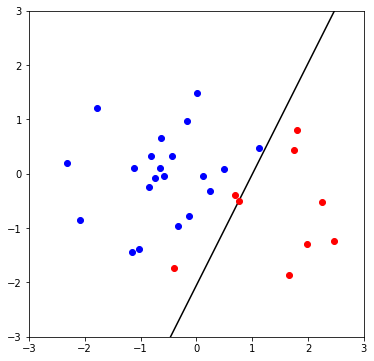

In [16]:
from matplotlib import pyplot

seq = numpy.arange(-3, 3, 0.02)
pyplot.figure(figsize = (6, 6))
pyplot.xlim(-3, 3)
pyplot.ylim(-3, 3)
pyplot.plot(seq, -(w[0]*seq + b)/w[1], 'k-')
pyplot.plot(X[T == 1,0], X[T == 1,1], 'ro')
pyplot.plot(X[T == -1,0], X[T == -1,1], 'bo')